# [ML] Linear Regression
### Compare Linear Regression from Statistics's POV and Machine Learning's POV.
#### -- Duc Tai Dinh - AI23, HCMUS, VNUHCM --

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

%matplotlib inline

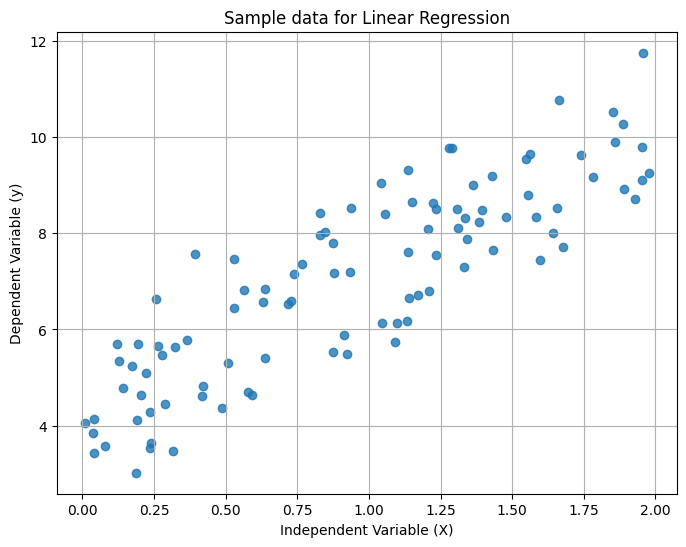

In [2]:
# Create Sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualize Sample data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.8)
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.title("Sample data for Linear Regression")
plt.grid(True)
plt.show()

In [3]:
# Add a constant column to X to calculate the intercept.
X_stats = sm.add_constant(X)

# Create and train OLS
model_stats = sm.OLS(y, X_stats)
results_stats = model_stats.fit()

# Print detailed statistics results.
print(results_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     289.3
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           5.29e-31
Time:                        03:44:14   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2222      0.193     21.843      0.0

In [4]:
# Use LinearRegression from scikit-learn
model_ml = LinearRegression()

# Train model
model_ml.fit(X, y)

# Slope, Intercept
print(f"Intercept (w₀): {model_ml.intercept_[0]:.4f}")
print(f"Slope (w₁): {model_ml.coef_[0][0]:.4f}")

# Predict on dataset
y_pred_ml = model_ml.predict(X)

# Evaluate model
mse_ml = mean_squared_error(y, y_pred_ml)
r2_ml = r2_score(y, y_pred_ml)
print(f"Mean Squared Error (MSE): {mse_ml:.4f}")
print(f"R-squared: {r2_ml:.4f}")

Intercept (w₀): 4.2222
Slope (w₁): 2.9685
Mean Squared Error (MSE): 0.9924
R-squared: 0.7470


In [5]:
# Create new data to predict
X_new = np.array([[0], [2]])  # Ví dụ 2 điểm dữ liệu mới

# Predict
y_pred_new_ml = model_ml.predict(X_new)
print(f"Predict for X_new = {X_new.flatten()}: {y_pred_new_ml.flatten()}")

Predict for X_new = [0 2]: [ 4.22215108 10.1590861 ]


In [6]:
# Split dataset: train set, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model on train set
model_ml.fit(X_train, y_train)

# Predict on test set
y_pred_test_ml = model_ml.predict(X_test)

# Evaluate on test set
mse_test_ml = mean_squared_error(y_test, y_pred_test_ml)
r2_test_ml = r2_score(y_test, y_pred_test_ml)
print(f"MSE (test set): {mse_test_ml:.4f}")
print(f"R-squared (test set): {r2_test_ml:.4f}")

MSE (test set): 0.9178
R-squared (test set): 0.6521


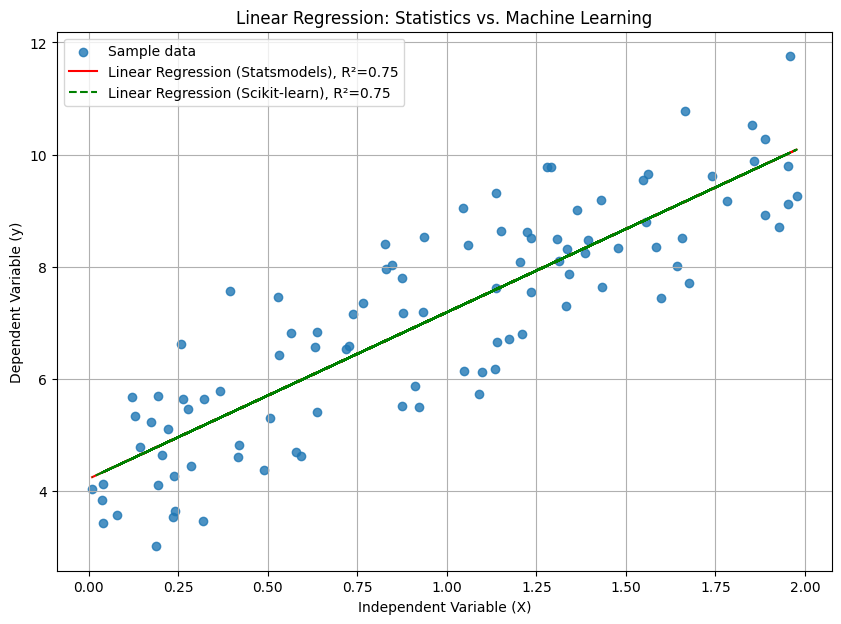

In [7]:
# Predict by statsmodels
y_pred_stats = results_stats.predict(X_stats)

# Draw graph
plt.figure(figsize=(10, 7))
plt.scatter(X, y, alpha=0.8, label="Sample data")
plt.plot(X, y_pred_stats, color='red', label=f'Linear Regression (Statsmodels), R²={results_stats.rsquared:.2f}')
plt.plot(X, y_pred_ml, color='green', linestyle='--', label=f'Linear Regression (Scikit-learn), R²={r2_ml:.2f}')
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.title("Linear Regression: Statistics vs. Machine Learning")
plt.legend()
plt.grid(True)
plt.show()